In [316]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [317]:
df = pd.read_csv('spam.csv', encoding='Latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [318]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [319]:
df.isnull().sum()*100/len(df)

v1             0.000000
v2             0.000000
Unnamed: 2    99.102656
Unnamed: 3    99.784637
Unnamed: 4    99.892319
dtype: float64

In [320]:
df.drop(columns={'Unnamed: 2','Unnamed: 3','Unnamed: 4'},axis=1,inplace=True)

In [321]:
df.rename(columns={'v1': 'target', 'v2': 'text'},inplace=True)

In [322]:
df.duplicated().sum()

np.int64(403)

In [323]:
df.drop_duplicates(inplace=True)

In [324]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['target'] = le.fit_transform(df['target'])


# EDA

<Axes: xlabel='target', ylabel='count'>

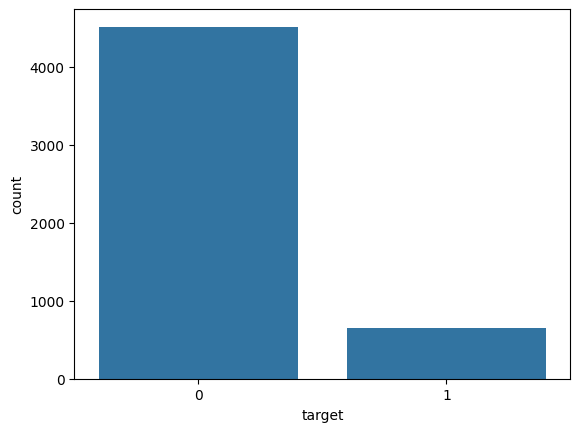

In [325]:
sns.countplot(x = df['target'])

([<matplotlib.patches.Wedge at 0x2321d4de5d0>,
 [Text(-0.42519425283422474, -1.014499801555794, 'ham'),
  Text(0.42519392226820807, 1.0144999401016135, 'spam')],
 [Text(-0.2319241379095771, -0.5533635281213422, '87.4%'),
  Text(0.23192395760084072, 0.553363603691789, '12.6%')])

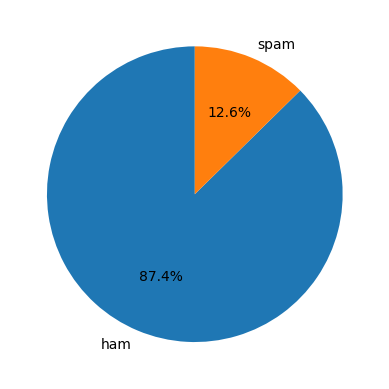

In [326]:
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%1.1f%%', startangle=90)

data  is embalanced

##### making new col for words numbers in text

In [327]:
import nltk

In [328]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\sandh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [329]:
df['num_char'] = df['text'].apply(len)

In [330]:
df

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


fetch the num of numbers

In [331]:
df['num_words']= df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [332]:
df

,target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [333]:
df['num_sentences']= df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [334]:
df

,target,text,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [335]:
df.describe()

,target,num_char,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


ham msgs

In [336]:
df[df['target'] == 0].drop('text',axis = 1).describe()

,target,num_char,num_words,num_sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


spam msgs

In [337]:
df[df['target'] == 1].drop('text',axis = 1).describe()

,target,num_char,num_words,num_sentences
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


plotting target

<Axes: xlabel='num_char', ylabel='Count'>

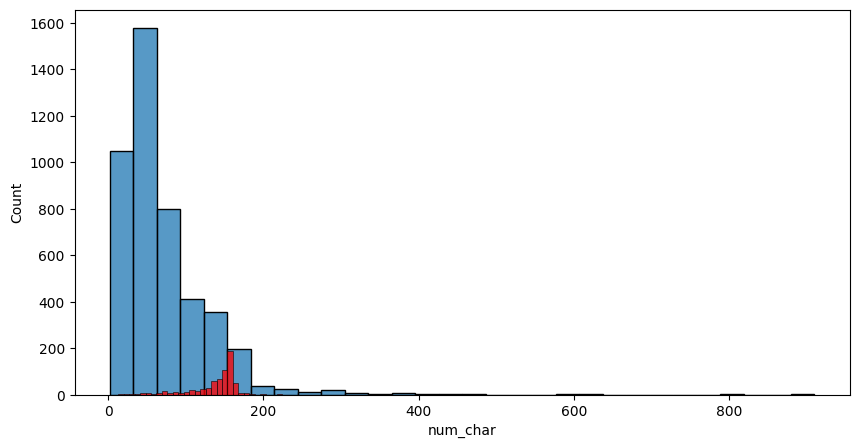

In [338]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['target'] == 0]['num_char'], bins=30)
sns.histplot(df[df['target'] == 1]['num_char'], bins=30,color = 'red')


<Axes: xlabel='num_words', ylabel='Count'>

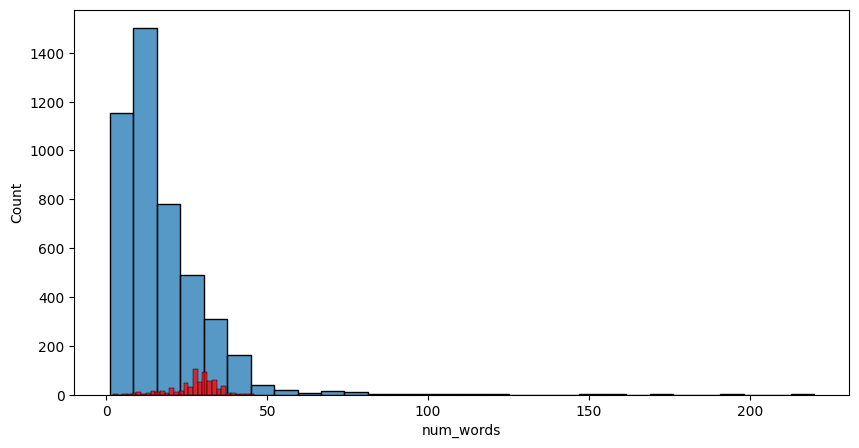

In [339]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['target'] == 0]['num_words'], bins=30)
sns.histplot(df[df['target'] == 1]['num_words'], bins=30,color = 'red')

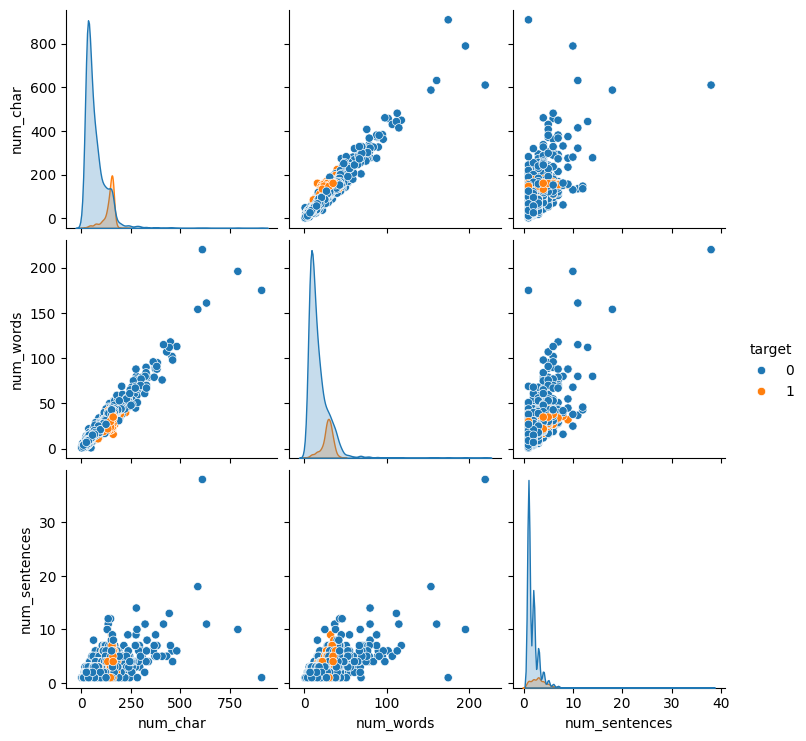

In [340]:
sns.pairplot(df, hue = 'target')

correlation

<Axes: >

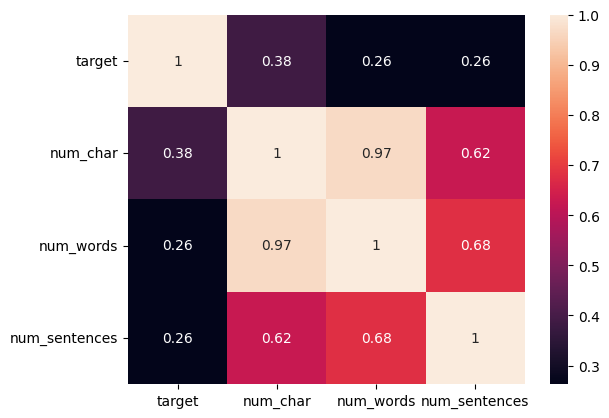

In [341]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

## Data preprocessing
. Lower case
. tokenization
. removing special characters
. removing stop words and punctuation
. stemming

In [342]:
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sandh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [343]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [344]:
from nltk.stem.porter import PorterStemmer

In [345]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y.copy()
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y.copy()
    y.clear()
    
    for i in text:
        y.append(PorterStemmer().stem(i))
        
    return ' '.join(y)

In [346]:
df['transformed_text'] = df['text'].apply(transform_text)

In [347]:
df

,target,text,num_char,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


### generating word cloud msgs

In [348]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

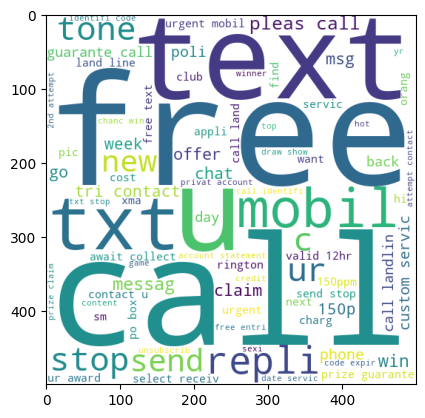

In [349]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=' '))
plt.imshow(spam_wc)

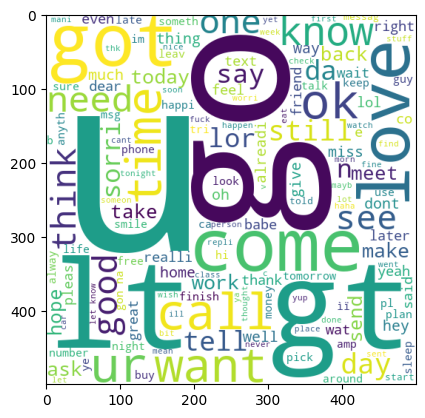

In [350]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=' '))
plt.imshow(ham_wc)

Top msgs used in both cat

In [351]:
df.head()

,target,text,num_char,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


for common words in spam

In [352]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
       
    

In [353]:
len(spam_corpus)

9939

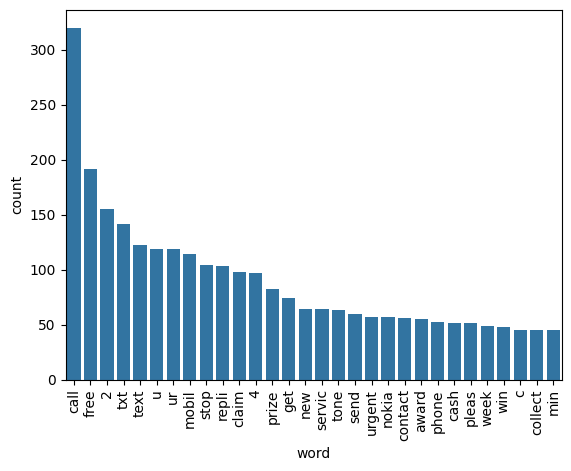

In [354]:
from collections import Counter
common_words_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=common_words_df)
plt.xticks(rotation=90)
plt.show()


common words in ham msgs


In [355]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [356]:
len(ham_corpus)

35404

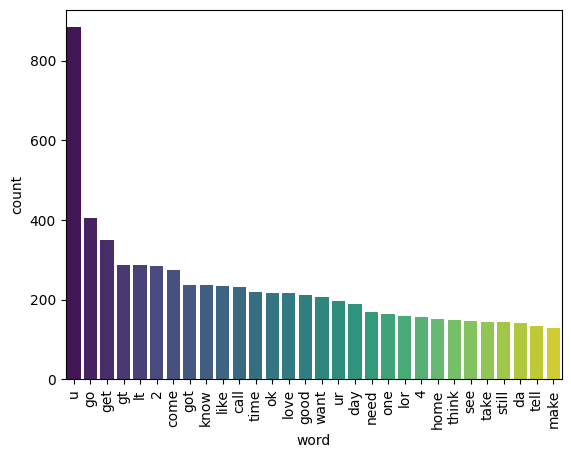

In [357]:
from collections import Counter
common_words_df = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=common_words_df,palette='viridis')
plt.xticks(rotation=90)
plt.show()

# Model Building

In [372]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000, min_df=7, max_df=0.7, stop_words='english')
cv = CountVectorizer()

In [373]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [374]:
import numpy as np


In [361]:
x.shape

(5169, 959)

In [362]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [363]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

### naive bayes

choosing tfidf mnb

### comparing with other algos

In [364]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB

In [365]:
svc = SVC(kernel= 'sigmoid', gamma= 1.0)
knn = KNeighborsClassifier(n_neighbors=5)
dtc = DecisionTreeClassifier(max_depth=5)
lr = LogisticRegression(solver='liblinear', penalty='l1')
ab = AdaBoostClassifier(n_estimators=100, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
gbc = GradientBoostingClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(n_estimators=100, random_state=42)
mnb = MultinomialNB()
bnb = BernoulliNB()
etc = ExtraTreesClassifier(n_estimators=100, random_state=42)
bc = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100)
gnb = GaussianNB()

In [366]:
clfs = {
    'svc': svc,
    'knn': knn,
    'dtc': dtc,
    'lr': lr,
    'ab': ab,
    'rf': rf,
    'gbc': gbc,
    'xgb': xgb,
    'mnb': mnb,
    'bnb': bnb,
    'gnb': gnb,
    'etc': etc,
    'bc': bc
}

In [367]:
def train_and_evaluate(clf, x_train, y_train, x_test, y_test):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    return accuracy, report, cm


In [368]:
train_and_evaluate(svc, x_train, y_train, x_test, y_test)

(0.9758220502901354,
 (0.9732142857142857, 0.8320610687022901, 0.897119341563786),
 array([[900,   3],
        [ 22, 109]]))

In [369]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    accuracy, report, cm = train_and_evaluate(clf, x_train, y_train, x_test, y_test)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {report[0]}, Recall: {report[1]}, F1 Score: {report[2]}")

    accuracy_scores.append(accuracy)
    precision_scores.append(report[0])
   

Model: svc
Accuracy: 0.9758220502901354
Precision: 0.9732142857142857, Recall: 0.8320610687022901, F1 Score: 0.897119341563786
Model: knn
Accuracy: 0.9158607350096711
Precision: 1.0, Recall: 0.33587786259541985, F1 Score: 0.5028571428571429
Model: dtc
Accuracy: 0.9294003868471954
Precision: 0.8222222222222222, Recall: 0.5648854961832062, F1 Score: 0.669683257918552
Model: lr
Accuracy: 0.965183752417795
Precision: 0.9523809523809523, Recall: 0.7633587786259542, F1 Score: 0.847457627118644
Model: ab
Accuracy: 0.9313346228239845
Precision: 0.96875, Recall: 0.4732824427480916, F1 Score: 0.6358974358974359
Model: rf
Accuracy: 0.9758220502901354
Precision: 0.9491525423728814, Recall: 0.8549618320610687, F1 Score: 0.8995983935742972
Model: gbc
Accuracy: 0.960348162475822
Precision: 0.9787234042553191, Recall: 0.7022900763358778, F1 Score: 0.8177777777777778
Model: xgb
Accuracy: 0.9738878143133463
Precision: 0.9727272727272728, Recall: 0.816793893129771, F1 Score: 0.8879668049792531
Model: mnb

In [370]:
performance_df = pd.DataFrame({
    'Model': list(clfs.keys()),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
})

In [371]:
performance_df.sort_values(by='Precision', ascending=False)

,Model,Accuracy,Precision
1,knn,0.915861,1.000000
6,gbc,0.960348,0.978723
9,bnb,0.981625,0.974576
0,svc,0.975822,0.973214
7,xgb,0.973888,0.972727
4,ab,0.931335,0.968750
8,mnb,0.972921,0.955752
3,lr,0.965184,0.952381
5,rf,0.975822,0.949153
11,etc,0.973888,0.940678


choosing bnb

In [376]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl', 'wb'))
pickle.dump(bnb,open('model.pkl', 'wb'))